<a href="https://colab.research.google.com/github/PintoPaola/Inteligencia-Artificial/blob/main/Laboratorio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# lab2 - Regresión Logistica



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Importa librerias

In [151]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np
import pandas as pd

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

## 1 Regresion Logistica



Este fragmento de código carga un conjunto de datos de un archivo CSV, divide los datos en conjuntos de entrenamiento y prueba, y luego imprime las primeras filas de los conjuntos de prueba X_test y y_test

In [152]:

data = pd.read_csv('/content/drive/MyDrive/IA/DATASET/cardiaco.csv', delimiter=',')
X_train, y_train = data.iloc[:56000, :11], data.iloc[:56000, 11]
X_test, y_test = data.iloc[56000:, :11], data.iloc[56000:, 11]
X = X_train
y = y_train
print(X_test.head())
print(y_test.head())

       18393  2  168    62  110   80  1  1.1  0  0.1  1.2
56000  18185  1  180  70.0  150  100  1    1  0    0    1
56001  22386  2  176  75.0  120   80  1    1  0    0    1
56002  16569  1  167  72.0  140   80  1    1  0    0    1
56003  18936  1  155  62.0  120   80  1    1  0    0    1
56004  16133  1  160  57.0  110   70  1    1  0    0    1
56000    1
56001    1
56002    1
56003    0
56004    0
Name: 0.2, dtype: int64


<a id="section1"></a>
### 1.2 Implementacion

#### 1.2.1 Fución Sigmoidea



Sirve para mapear las entradas a probabilidades en el rango de 0 a 1

In [153]:
def sigmoid(z):
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [154]:
# Prueba la implementacion de la funcion sigmoid
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


Normaliza las características de entrada de una matriz

In [155]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [156]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

<a id="section2"></a>
#### 1.2.2 Función de Costo y Gradiente



In [157]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X= np.concatenate([np.ones((m, 1)), X_norm], axis=1)
# X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [158]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J


implementa el algoritmo de descenso por el gradiente para encontrar los parámetros óptimos THETA de un modelo de regresión logística

In [159]:
# Descenso por el gradiente
def descensoGradiente(theta, X, y, alpha, num_iters):
    m = len(y)
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta))
        theta = theta - (alpha / m) * (X.T.dot(h - y))
        J_history.append(calcularCosto(theta, X, y))

    return theta, J_history

implementa el algoritmo de descenso por el gradiente para entrenar un modelo de regresión logística en los datos de entrenamiento
X,Y luego grafica la convergencia del costo a lo largo de las iteraciones. Los parámetros THETA resultantes se utilizan para hacer predicciones sobre nuevos datos

theta calculado por el descenso por el gradiente: [ 0.00656722  0.3995281   0.02136479 -0.05454534  0.30258249  0.15063097
  0.14209092  0.34931656 -0.00077501 -0.03130267 -0.02755343 -0.06473892]


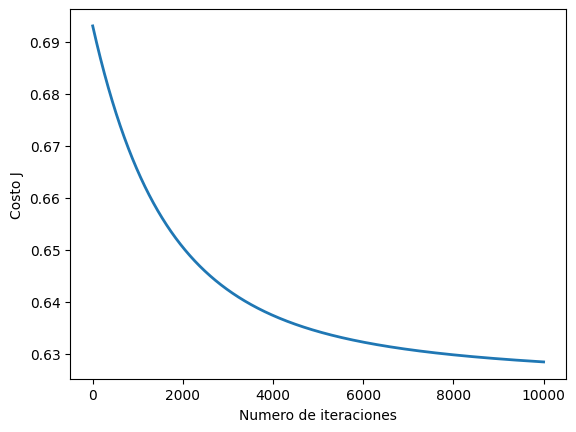

In [145]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# Inicializar theta y ejecutar descenso por el gradiente
theta = np.zeros(12)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [146]:
print(X_test)
print(theta)

       18393  2  168     62  110   80  1  1.1  0  0.1  1.2
56000  18185  1  180   70.0  150  100  1    1  0    0    1
56001  22386  2  176   75.0  120   80  1    1  0    0    1
56002  16569  1  167   72.0  140   80  1    1  0    0    1
56003  18936  1  155   62.0  120   80  1    1  0    0    1
56004  16133  1  160   57.0  110   70  1    1  0    0    1
...      ... ..  ...    ...  ...  ... ..  ... ..  ...  ...
69994  19240  2  168   76.0  120   80  1    1  1    0    1
69995  22601  1  158  126.0  140   90  2    2  0    0    1
69996  19066  2  183  105.0  180   90  3    1  0    1    0
69997  22431  1  163   72.0  135   80  1    2  0    0    0
69998  20540  1  170   72.0  120   80  2    1  0    0    1

[13999 rows x 11 columns]
[ 0.00656722  0.3995281   0.02136479 -0.05454534  0.30258249  0.15063097
  0.14209092  0.34931656 -0.00077501 -0.03130267 -0.02755343 -0.06473892]


In [147]:
X_test, y_test = data.iloc[56000:, :11], data.iloc[56000:, 11]
print(X_test)


       18393  2  168     62  110   80  1  1.1  0  0.1  1.2
56000  18185  1  180   70.0  150  100  1    1  0    0    1
56001  22386  2  176   75.0  120   80  1    1  0    0    1
56002  16569  1  167   72.0  140   80  1    1  0    0    1
56003  18936  1  155   62.0  120   80  1    1  0    0    1
56004  16133  1  160   57.0  110   70  1    1  0    0    1
...      ... ..  ...    ...  ...  ... ..  ... ..  ...  ...
69994  19240  2  168   76.0  120   80  1    1  1    0    1
69995  22601  1  158  126.0  140   90  2    2  0    0    1
69996  19066  2  183  105.0  180   90  3    1  0    1    0
69997  22431  1  163   72.0  135   80  1    2  0    0    0
69998  20540  1  170   72.0  120   80  2    1  0    0    1

[13999 rows x 11 columns]


Se toma los datos de prueba X_test, los normaliza usando la función featureNormalize, agrega una columna de unos al principio para el término de intercepción, y luego utiliza un modelo de regresión logística previamente entrenado (definido por el vector de parámetros theta) para hacer predicciones sobre los datos de prueba normalizados. Las predicciones se calculan aplicando la función sigmoide a la multiplicación de la matriz de características normalizadas por el vector de parámetros


In [168]:

# Normalizar los datos de prueba X_test
X_test_norm, mu, sigma = featureNormalize(X_test)

# Agregar una columna de unos correspondiente al término de intercepción
m, n = X_test_norm.shape
X_test_norm = np.concatenate([np.ones((m, 1)), X_test_norm], axis=1)

# multiplicación de la matriz X_test_norm con el vector theta
aprueba = sigmoid(X_test_norm.dot(theta))

# Imprimir la salida del modelo
print(aprueba)


[0.37805247 0.54806195 0.33163876 ... 0.831224   0.60235911 0.5824632 ]


In [170]:
print(X_test_norm)
print(theta)
predict =sigmoid(X_test_norm.dot(theta))
print(predict)

[[ 1.         -0.52632243 -0.75027441 ... -0.31271166 -0.24192048
   0.49454708]
 [ 1.          1.18332684  1.33284567 ... -0.31271166 -0.24192048
   0.49454708]
 [ 1.         -1.18397375 -0.75027441 ... -0.31271166 -0.24192048
   0.49454708]
 ...
 [ 1.         -0.16778851  1.33284567 ... -0.31271166  4.13358964
  -2.02205218]
 [ 1.          1.20164015 -0.75027441 ... -0.31271166 -0.24192048
  -2.02205218]
 [ 1.          0.43207415 -0.75027441 ... -0.31271166 -0.24192048
   0.49454708]]
[ 0.00656722  0.3995281   0.02136479 -0.05454534  0.30258249  0.15063097
  0.14209092  0.34931656 -0.00077501 -0.03130267 -0.02755343 -0.06473892]
[0.37805247 0.54806195 0.33163876 ... 0.831224   0.60235911 0.5824632 ]
